
  <div style="text-align: center ">Class Tutorial part 1 : Learn networkx API to build, generate and visualize social graphs </div>
 
 <div style="text-align: center "> Part 1 of Unit 1 Hands on </div>

  <div style="text-align: center "> Network Analysis and Mining (Elective 4: 6th Semester CSE, 2023) </div>
 <div style="text-align: center "> Bhaskarjyoti Das </div>
  <div style="text-align: center "> PES University </div>

  <div style="text-align: center "> Disclaimer : The material is borrowed and adapted from various tutorials at Networkx sites and elsewhere </div>

You need to refer to the online documentation of networkx to understand the code in this workbook https://networkx.github.io/documentation/stable/tutorial.html



# Building Basic Network 


## Basic Graph data Structures


* **Graph**: Undirected graph, allows self-loops

* **DiGraph**: Directed graph, allows self-loops

* **MultiGraph**: Undirected graph with parallel edges, allows self-loops

* **MultiDiGraph**: Directed graph with parallel edges, allows self-loops


**Adjacency Matrix** A $n x n$ matrix:

        0  1  1        G = [[0, 1, 1],
        1  0  1             [1, 0, 1],
        1  1  0             [1, 1, 0]]

**Adjacency List** A list of neighbors:

        A: B, C        G = {'A': ['B', 'C'],
        B: A, C             'B': ['A', 'C'],
        C: A, B             'C': ['A', 'B']} 

**Edge List** A list of edges:

        A B            G = [['A', 'B'],
        A C                 ['A', 'C'],
        B C                 ['B', 'C']]

NetworkX uses a __dictionary of dictionaries__ based **Adjacency List** format which is fast and ligthweight for sparse graphs. 
This approach allows for natural expressions such as:

* **n in G** to test if the graph $G$ contains node $n$
* **for n in G** to loop over all nodes
* **G[n]** to access all neighbors of $n$ in $G$
* **len(G)** to get the number of nodes in $G$

Internally the node $n$ is a key in the $G.adj$ dictionary, values are themselves dictionaries with neighbors as keys and another dictionary as value that holds edge attributes.

So NetworkX graphs are "dictionaries all the way down". This is not exactly true in version 2.0 but it is safe for users to think of it this way. 

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Bhaskar\anaconda3\python.exe
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))


NetworkX version: 2.6.3


In [4]:
G = nx.Graph()
D = nx.DiGraph()
MG = nx.MultiGraph()
MDG = nx.MultiDiGraph()

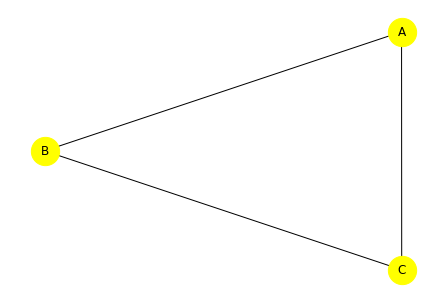

In [5]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C')])
nx.draw(G, node_size=800, node_color='yellow', with_labels=True)

In [6]:
print(G.adj)

{'A': {'B': {}, 'C': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'A': {}, 'B': {}}}


In [7]:
'A' in G

True

In [13]:
data(G)

NameError: name 'data' is not defined

In [7]:
# find if there exist a node in a graph
print(G.has_node('A'))

True


In [8]:
#find about the neighbours of A
print(G['A'])

{'B': {}, 'C': {}}


In [9]:
#list of nodes
for n in G:
    print(n)

A
B
C


In [10]:
#no of nodes really 
len(G)

3

## Creating Graphs and adding and removing Nodes and Edges

NetworkX is a node centric package; nodes can be any hashable object.

A graph $G$ can be grown in several ways:

* Adding nodes with:
    - **G.add_node** : One node at a time
    - **G.add_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.add_edge**: One edge at a time
    - **G.add_edges_from** : A container of edges

In [11]:
# Create an undirected Graph
G = nx.Graph()
# One node at a time
G.add_node(1)  # "method" of G
# A list of nodes
G.add_nodes_from([2, 3])
len(G)

3

In [12]:
# A container of nodes
H = nx.path_graph(10)   # path_graph is a generator
G.add_nodes_from(H) # G now contains the nodes of H
len(G)


10

In [13]:
# Create an undirected Graph
G = nx.Graph()

# In contrast, you could use the graph H as a node in G. 
G.add_node(H) # G now contains Graph H as a node 
len(G)

1

G can also be grown by adding edges.

If the edge added already exists no error is raised.

If the nodes referred by edges do not already exist they are automatically added to the graph.

In [14]:
# Adding a single edge
G.add_edge(1, 2)
# If you have a tuple representing an edge you have to unpack it
e = (2, 3)
G.add_edge(*e) # unpack edge tuple with *
# Add a list of edges 
G.add_edges_from([(1, 2), (1, 3)])
# Add from a container of edges
G.add_edges_from(H.edges())

Similarly you can remove nodes and edges

* Removing nodes with:
    - **G.remove_node** : One node at a time
    - **G.remove_nodes_from** : A conteiner of nodes
* Adding edges with:
    - **G.remove_edge**: One edge at a time
    - **G.remove_edges_from** : A container of edges


In [15]:
# Assign graph attributes when creating a new graph
G = nx.Graph(day='Friday', name='My Graph')
G.graph # Access to the dictionary that stores graph attrs

{'day': 'Friday', 'name': 'My Graph'}

In [16]:
# Or you can modify attributes later
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph'}

In order to add node attributes you can use the methods **G.add_node** and **G.add_nodes_from**, or the node attribute dictionary **G.node**


In [17]:
G.add_node(1, time='5pm')
len(G)


1

In [18]:
G.add_nodes_from([3], time='2pm') # multiple nodes
len(G)

2

In [19]:
G.nodes[1]['room'] = 714 # add new attribute to anb existing node
len(G)

2

Adding a node that is already in the graph does not raise an error, you can add new attributes to an existing node by adding it again with a new attribute:  

In [20]:
G.add_node(3, room=715)

In order to access node attribute information you can:

In [21]:
# Access the value of the attribute
G.nodes[1]['time']

'5pm'

In practice it's usually more useful to iterate over nodes with their attributes 

In [22]:
# Nodes without attributes
list(G.nodes())

[1, 3]

In [23]:
# Get Tuples of node and attribute dictionary
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm', 'room': 715})]

You can also set node attributes using the function **nx.set_node_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by node with the value of the attribute for each node or a single value that will be used for all nodes:

In [24]:
nx.set_node_attributes(G, 'year', 2017)

In [25]:
nx.get_node_attributes(G, 'time')

{1: '5pm', 3: '2pm'}

In order to add edge attributes you can use the methods G.add_edge and G.add_edges_from; the edge attribute dictionary G.edge or subscript notation.

In [26]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])


In [27]:
# When an edge is already added you can use subscript notation or update the edge attribute dictionary
G[1][2]['weight'] = 4.0
 

Adding an edge that is already in the graph does not raise an error, you can add new attributes to an existing edge by adding it again with a new attribute:  

In [28]:
G.add_edge(3, 4, weight=12)

In [29]:
# Attributes dictionary for edge 1 -- 2
G[1][2]

{'weight': 4.0, 'color': 'blue'}

In practice it's usually more useful to iterate over edges with their attributes

In [30]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [31]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [32]:
# In NetworkX version 2.0 you can also directly specify the edge attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


You can also set edge attributes using the function nx.set_edge_attributes. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by edge with the value of the attribute for each edge or a single value that will be used for all edges:

In [33]:
nx.set_edge_attributes(G, 'capacity', 1)

In [14]:
print(nx.info(G))

Graph with 3 nodes and 3 edges


## Get some properties of the graph 

In [35]:
#getting the number of nodes is a graph
print(G.nodes())

[1, 3, 2, 4, 5]


In [36]:
#getting the number of edges in a graph
print(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]


In [37]:
# get the degrees from a graph
print(G.degree())
print (nx.degree(G))

[(1, 1), (3, 2), (2, 2), (4, 2), (5, 1)]
[(1, 1), (3, 2), (2, 2), (4, 2), (5, 1)]


In [38]:
# find if a graph has a an edge
print(G.has_edge(2,3))

True


In [39]:
# find if a graph has a an edge
print(G.has_edge(2,4))

False


In [40]:
# find if there exist a node in a graph
print(G.has_node(4))

True


In [41]:
#It has no of  attribute still at Graph level 
G.graph

{'day': 'Monday', 'name': 'My Graph'}

# Adding and removing  Attributes (Graph, Node, and Edge)
Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary.

## Graph attributes

In [42]:
# Assign graph attributes when creating a new graph
G = nx.Graph(day='Friday', name='My Graph')
G.graph # Access to the dictionary that stores graph attrs

{'day': 'Friday', 'name': 'My Graph'}

In [43]:
# Or you can modify attributes later
G.graph['day']='Monday'
G.graph

{'day': 'Monday', 'name': 'My Graph'}

## Node attributes

In order to add node attributes you can use the methods **G.add_node** and **G.add_nodes_from**, or the node attribute dictionary **G.node**

In [44]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # multiple nodes
G.nodes[1]['room'] = 714 # add new attribute

Adding a node that is already in the graph does not raise an error, you can add new attributes to an existing node by adding it again with a new attribute:

In [45]:
G.add_node(3, room=715)

In order to access node attribute information you can:

In [46]:
# Access the value of the attribute
G.nodes[1]['time']

'5pm'

In [47]:
# Access the attribute dictionary
G.nodes[1]

{'time': '5pm', 'room': 714}

In practice it's usually more useful to iterate over nodes with their attributes 

In [48]:
# Nodes without attributes
list(G.nodes())

[1, 3]

In [49]:
# Tuples of node and attribute dictionary
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm', 'room': 715})]

In [50]:
# In NetworkX version 2.0 you can also directly specify the node attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.nodes(data='room')))

[(1, 714), (3, 715)]


You can also set node attributes using the function **nx.set_node_attributes**. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by node with the value of the attribute for each node or a single value that will be used for all nodes:

In [51]:
nx.set_node_attributes(G, 'year', 2017)

You can get a dictionary keyed by node with the value of a node attribute with the function nx.get_node_attributes:

In [52]:
nx.get_node_attributes(G, 'time')

{1: '5pm', 3: '2pm'}

## Edge Attributes
In order to add edge attributes you can use the methods G.add_edge and G.add_edges_from; the edge attribute dictionary G.edge or subscript notation.

In [53]:
G.add_edge(1, 2, weight=4.0 )
G.add_edges_from([(3, 4),(4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])
# When an edge is already added you can use subscript notation or update the edge attribute dictionary
G[1][2]['weight'] = 4.0


Adding an edge that is already in the graph does not raise an error, you can add new attributes to an existing edge by adding it again with a new attribute:

In [54]:
G.add_edge(3, 4, weight=12)

In order to access edge attribute information you can:

In [55]:
# Access the value of attribute weight
G[1][2]['weight'] # or equivalently G.edge[1][2]['weight']

4.0

In [56]:
# Attributes dictionary for edge 1 -- 2
G[1][2] # or equivalently G.edge[1][2]

{'weight': 4.0, 'color': 'blue'}

In practice it's usually more useful to iterate over edges with their attributes 

In [57]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [58]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [59]:
# In NetworkX version 2.0 you can also directly specify the edge attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


You can also set edge attributes using the function nx.set_edge_attributes. Its arguments are a graph object, a string with the name of the attribute, and a dictionary keyed by edge with the value of the attribute for each edge or a single value that will be used for all edges:

In [60]:
nx.set_edge_attributes(G, 'capacity', 1)

In [61]:
print(nx.info(G))

Graph named 'My Graph' with 5 nodes and 4 edges


##  Putting them together

In [62]:
# You do this while creating this graph
D = nx.Graph(name='Hello World ! Graph')

In [63]:
# Adding Properties to this graph
D.add_node(1,name='ben', email='ben@benford.com', age=45)
D.add_node(2,name='john', email='john@gmail.com', age=34)
D.add_node(3,name='cletus', email='cletus@yahoo.com', age=26)
D.add_node(4,name='emmanuel', email='emmanuel@yahoo.com', age=99)

In [64]:
#print the info of the graph
print(nx.info(D))

Graph named 'Hello World ! Graph' with 4 nodes and 0 edges


In [65]:
#print the properties of the graph
print(D.nodes(data=True))

[(1, {'name': 'ben', 'email': 'ben@benford.com', 'age': 45}), (2, {'name': 'john', 'email': 'john@gmail.com', 'age': 34}), (3, {'name': 'cletus', 'email': 'cletus@yahoo.com', 'age': 26}), (4, {'name': 'emmanuel', 'email': 'emmanuel@yahoo.com', 'age': 99})]


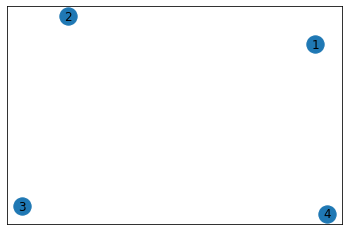

In [66]:
#draw the graph
nx.draw_networkx(D)

# Graph Generators

Take a look at all NetworkX [Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

Networkx has the ablity to generate some standard graph models

## Generator of some sample graphs 

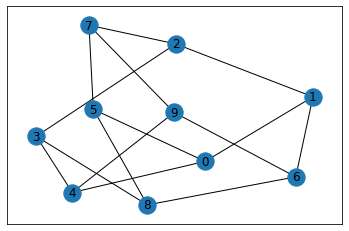

In [67]:
# small graphs
D = nx.petersen_graph()
nx.draw_networkx(D)


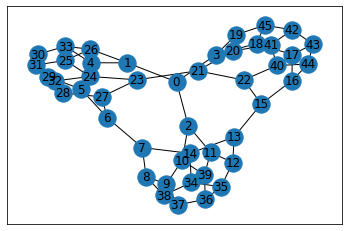

In [68]:
D = nx.tutte_graph()
nx.draw_networkx(D)



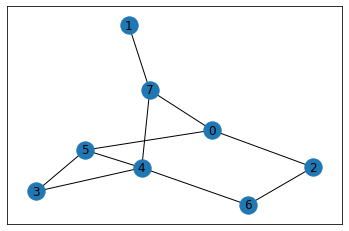

In [69]:
D = nx.sedgewick_maze_graph()
nx.draw_networkx(D)


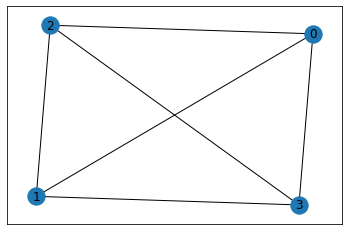

In [70]:
D = nx.tetrahedral_graph()
nx.draw_networkx(D)


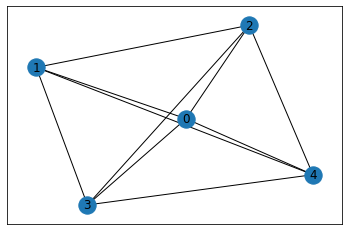

In [71]:
# classic graphs
D = nx.complete_graph(5)
nx.draw_networkx(D)


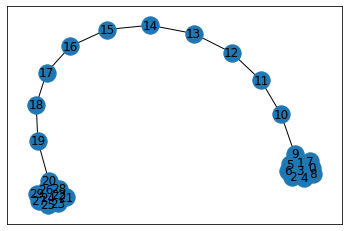

In [72]:
D = nx.barbell_graph(10, 10)
nx.draw_networkx(D)

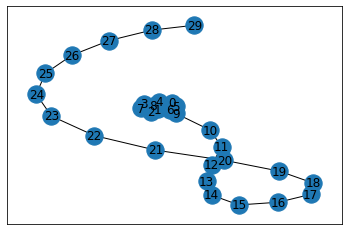

In [73]:
D = nx.lollipop_graph(10, 20)
nx.draw_networkx(D)

## Generate social graph from few sample dataset


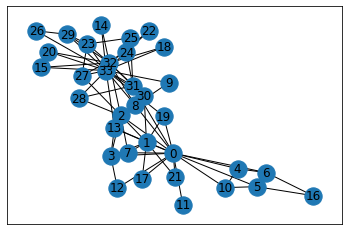

In [74]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

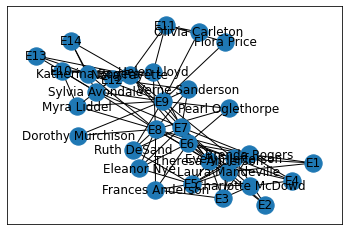

In [75]:
G=nx.davis_southern_women_graph()
nx.draw_networkx(G)

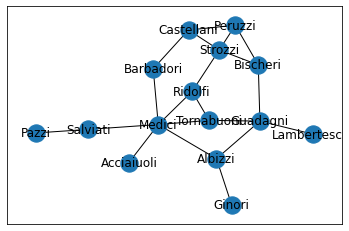

In [76]:
G=nx.florentine_families_graph()
nx.draw_networkx(G)

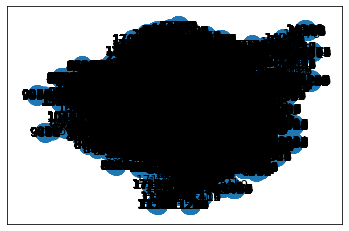

In [77]:
D = nx.random_lobster(100, 0.9, 0.9)
nx.draw_networkx(D)

# Ways to build graphs using graphs 

Checkout the networkx documentation 

Applying classic graph operations
* **nx.subgraph(G, node_list)** : induce subgraph of G on nodes in node_list
* **nx.union(G1,G2)** : graph union
* **nx.disjoint_union(G1,G2)** : graph union assuming all nodes are different
* **nx.cartesian_product(G1,G2)**: return Cartesian product graph
* **nx.compose(G1,G2)**:  combine graphs identifying nodes common to both
* **nx.complement(G)**: graph complement
* **nx.create_empty_copy(G)**: return an empty copy of the same graph class

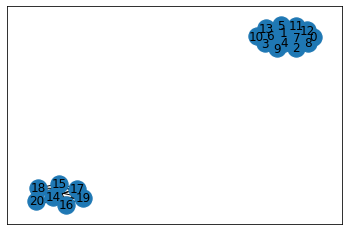

In [78]:
G1=nx.complete_graph(range(0, 14))
G2 =nx.complete_graph(range(14, 21))
G = nx.union(G1,G2) # graph union
nx.draw_networkx(G)

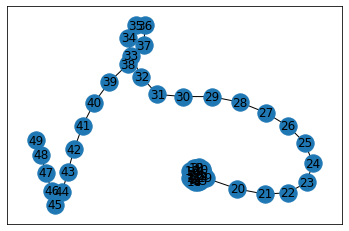

In [79]:
G1=nx.lollipop_graph(10,20)
G2 =nx.lollipop_graph(20,30)
G = nx.compose(G1,G2) # graph union
nx.draw_networkx(G)


## Exercise  1 : Build an undirected graph with 50 nodes named as integers from 1 to 50.

In [80]:
G = nx.Graph()
G.add_nodes_from(range(1, 51))

Add edges between nodes with consecutive numbers, that is, node 1 should have and edge to node 2, node 2 to node 3, etc .

In [81]:
G.add_edges_from(zip(range(1, 51), range(2, 51)))

Add a node attribute named kind with the value odd if the node is odd or even if the node is even:

In [82]:
for n in G:
    G.nodes[n]['kind'] = 'even' if n % 2 == 0 else 'odd'

Add an edge attribute named **product** with the value of the product of the two nodes that it links.

In [83]:
for u, v in G.edges():
    G[u][v]['product'] = u * v

Build a set with all nodes that have odd as the value of node attribute kind

In [84]:
{n for n, data in G.nodes(data=True) if data['kind'] == 'odd'}

{1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49}

Build a set of edges that have a value greater than 2000 for their edge attribute product

In [85]:
{(u, v) for u, v, data in G.edges(data=True) if data['product'] > 2000}

{(45, 46), (46, 47), (47, 48), (48, 49), (49, 50)}

In [86]:
#find number of nodes in a graph
print (G.number_of_nodes())

50


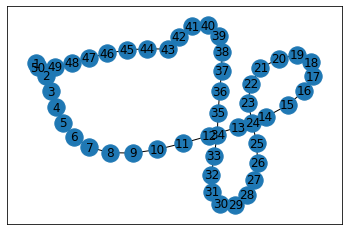

In [87]:
nx.draw_networkx(G)

## Exercise 2 : try to draw a social graph from a real dataset (Florentine families)

In [88]:
G = nx.florentine_families_graph()

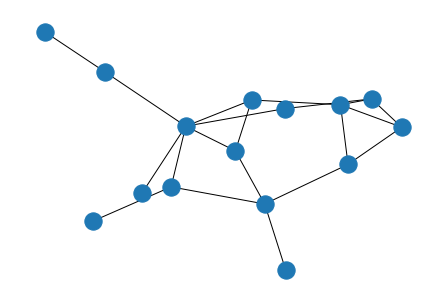

In [89]:
# The function nx.draw is main entry point for NetworkX plotting functions
nx.draw(G)

By default, the layout (that is the position of the nodes in the 2D plane) used is the spring layout. NetworkX, especially in the upcoming 2.0 version, has some more interesting layout algorithms. We can precompute the layout for a given graph and then pass it to the **nx.draw** function

In [90]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([ 0.70815821, -0.15517309]),
 'Medici': array([ 0.23501442, -0.06643094]),
 'Castellani': array([0.20785437, 0.83221896]),
 'Peruzzi': array([-0.16249575,  0.79826987]),
 'Strozzi': array([-0.01862598,  0.60783957]),
 'Barbadori': array([0.43115622, 0.45249774]),
 'Ridolfi': array([0.13240124, 0.22623781]),
 'Tornabuoni': array([ 0.05338596, -0.14200115]),
 'Albizzi': array([ 0.20510918, -0.57291503]),
 'Salviati': array([-0.42132381, -0.12153428]),
 'Pazzi': array([-0.89853534, -0.1677366 ]),
 'Bischeri': array([-0.24579563,  0.3321296 ]),
 'Guadagni': array([-0.18257133, -0.30985535]),
 'Ginori': array([ 0.39527461, -1.        ]),
 'Lamberteschi': array([-0.43900636, -0.71354711])}

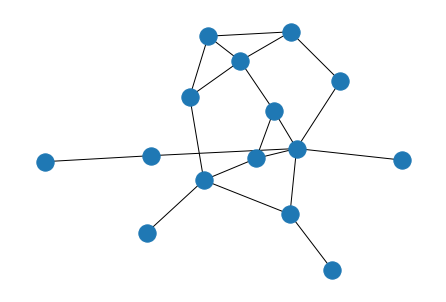

In [91]:
nx.draw(G, pos=pos_fr)

We can also control the size and color of the nodes, the with of the edges, the labels of the nodes and their fonts via kwargs of nx.draw:

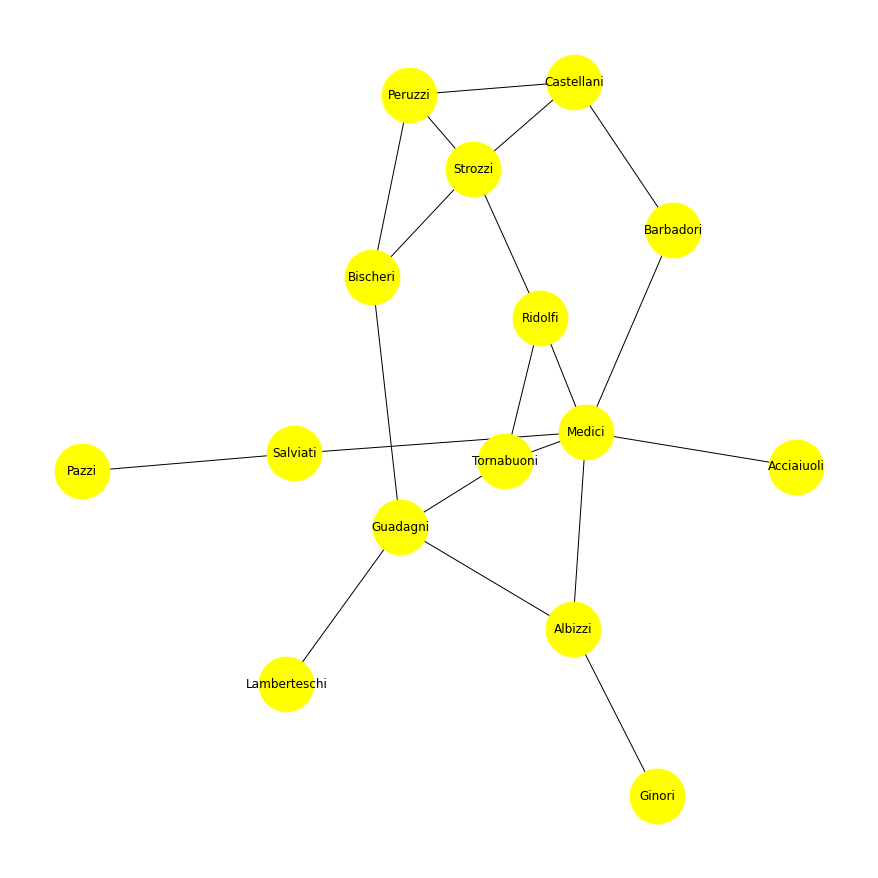

In [92]:
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='yellow', with_labels=True)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc ... We have to use more specialized plot functions such as:

nx.draw_networkx_nodes

nx.draw_networkx_edges

nx.draw_networkx_lables

nx.draw_networkx_edge_lables

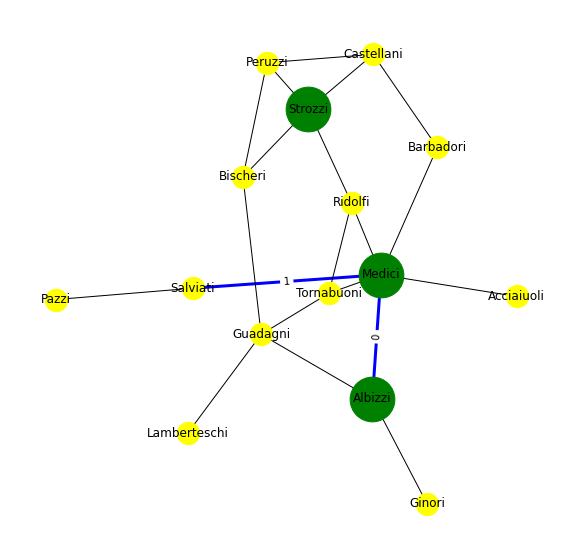

In [93]:
plt.figure(figsize=(10,10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='yellow')
# Plot edges 
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in other_nodes})

# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

# Networkx Visualization 

NetworkX is not aesthetically the best library for network visualization. In fact, it does not even do visualization on its
own but uses services rendered by Matplotlib, a multipurpose graphics library.  

The process of network visualization consists of two phases: layout and rendering. At the layout phase, the software selects geometric positions of each node according to a layout algorithm.

NetworkX supports a variety of layout algorithms. You can choose one of them, based on your aesthetic preferences and your network’s aesthetic propensity. For each algorithm, NetworkX has a proper layout function that takes the graph to plot and returns a dictionary of node positions (to be used at the rendering phase), and an all-in-one function that does both layout and rendering.

## Networkx layouts

layout : Random ; Requires numpy ; Layout function : pos=nx.random_layout() ; all in one : nx.draw_random()

layout : Circular ;On a circle ; Layout function : pos=nx.circular_layout() ; all in one : nx.draw_circular()

layout : Shell ; On concentric circles, as defined by nlist ; Layout function :pos=nx.shell_ layout(G,nlist=None) ; all in one : nx.draw_shell()

layout : Spectral ; Based on eigenvector centrality ; Layout function :pos=nx.spectral_layout() ; all in one : nx.draw_spectral()

layout : Forcedirected; As if they were physical balls that repel one another, connected with springs ; Based on eigenvector centrality ; Layout function :pos=nx.fruchterman_reingold_layout()

layout : Forcedirected; As if they were physical balls that repel one another, connected with springs ; Based on eigenvector centrality ; Layout function :pos=nx.spring_layout(); nx.draw_spring()

layout : Forcedirected; As if they were physical balls that repel one another, connected with springs ; Based on eigenvector centrality ; Layout function :pos=nx.spring_layout(); nx.draw_networkx()


In [94]:
 Graph = nx.complete_graph(15)
   

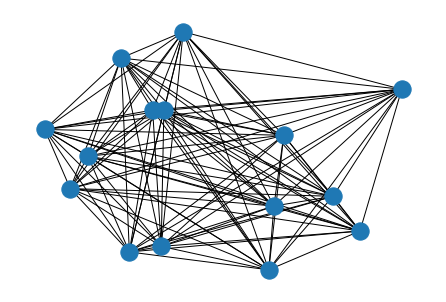

In [95]:
nx.draw_random(Graph)

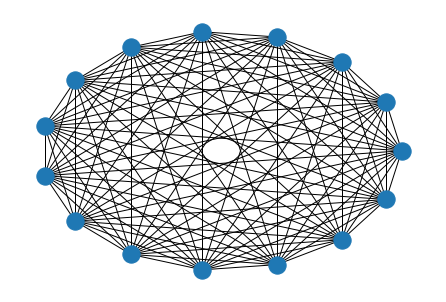

In [96]:
 nx.draw_circular(Graph)

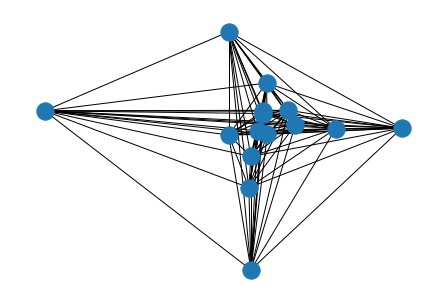

In [97]:
nx.draw_spectral(Graph)

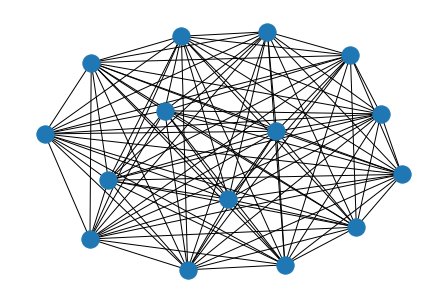

In [98]:
nx.draw_spring(Graph)

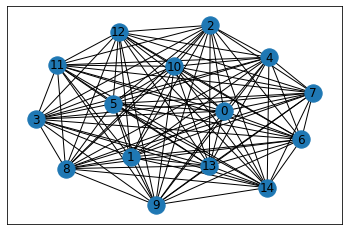

In [99]:
nx.draw_networkx(Graph)

# Loading and saving the network  Dataset

You can see the complete list of supported formats in networkx documentation 

Watch out for two things : (a) Does the format support directed graph (b) Will it store attributes ?


Adjacency list Simple format, no attributes

nx.read_adjlist

nx.write_adjlist

Edge list Simple format, no attributes

nx.read_edgelist

nx.write_adjlist

GEXF Designed to be a standard exchange format for graphs (Gephi)

nx.read_gexf

nx.write_gexf

GML Hierarchical ASCII-based file format for describing graphs

nx.read_gml

nx.write_gml

Pickle Python standard persistency module (serialize objects to HD)

nx.read_gpickle

nx.write_gpickle

GraphML An XML-based file format for graphs

nx.read_graphml

nx.write_graphml

Pajek Popular network format used in Pajek (no complete written specification)

nx.read_pajek

nx.write_pajek

In [100]:
#reading from edgelist 
G = nx.read_edgelist('Datasets/FB/facebook_combined.txt')
print (nx.number_of_nodes(G))
print (nx.number_of_edges(G))
print (nx.is_directed(G))
#nx.draw_networkx(G)

4039
88234
False


In [101]:
#reading from Pajek 
G2 = nx.read_pajek("Datasets/football/football.net") #.net
print (nx.info(G2))
print (nx.number_of_nodes(G2))
print (nx.number_of_edges(G2))
print (nx.is_directed(G2))
#nx.draw_networkx(G2)

MultiDiGraph with 35 nodes and 118 edges
35
118
True


MultiGraph with 34 nodes and 78 edges
34
78
False


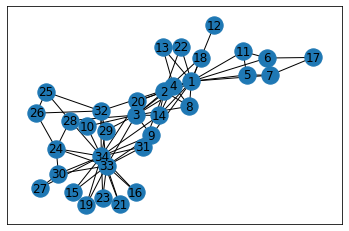

In [102]:
#Reading undirected pajek graph database 
G3 = nx.read_pajek("Datasets/karate/karate.paj") 
print (nx.info(G3))
print (nx.number_of_nodes(G3))
print (nx.number_of_edges(G3))
print (nx.is_directed(G3))
nx.draw_networkx(G3)

In [103]:
#reading from graphml 
G4 = nx.read_graphml("Datasets/wikipedia/wikipedia.graphml")
print (nx.info(G4))
print (nx.number_of_nodes(G4))
print (nx.number_of_edges(G4))
print (nx.is_directed(G4))
#nx.draw_networkx(G4)

DiGraph with 921 nodes and 1081 edges
921
1081
True


DiGraph with 4 nodes and 5 edges
True


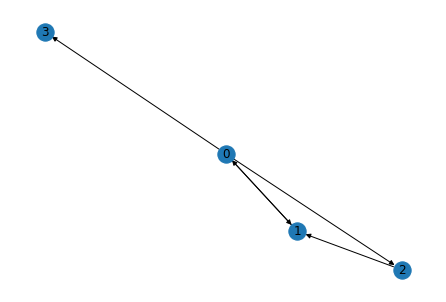

In [104]:
#reading from gexf 
#G5 = nx.read_gexf("Datasets/GEXF/EuroSiS_Generale_Pays.gexf")  
G5 = nx.read_gexf("Datasets/GEXF/data.gexf")
print (nx.info(G5))
print (nx.is_directed(G5))
nx.draw_spring(G5,with_labels=1)
#nx.draw_networkx(G5)

In [106]:
#saving the network data 
nx.write_gexf(G5,"test.gexf")

In [107]:
G6=nx.read_gexf("test.gexf")

DiGraph with 4 nodes and 5 edges
True


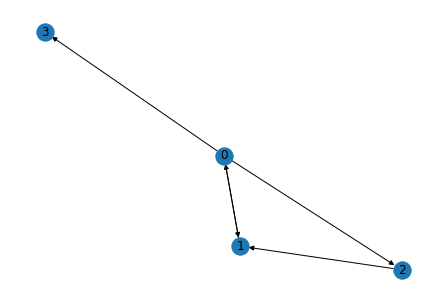

In [108]:
print (nx.info(G6))
print (nx.is_directed(G6))
nx.draw_spring(G6,with_labels=1)


#  DiGraphs, MultiGraphs and MultiDiGraphs

Directed graph, directed multi graph and multi-graphs are not frequently used. These sections are for completeness


##  Creating Directed Graph 

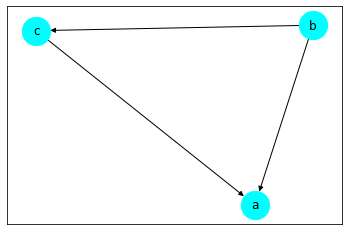

In [109]:
b = nx.DiGraph([{'a','b'},{'b','c'},{'c','a'}])
#plot our graph
nx.draw_networkx(b,with_labels=True, node_size=800,node_color='cyan')

In [110]:
#adding egdes to di graph
b.add_edge('a','b')

b.add_edges_from([{'d','c'},{'d','b'}])

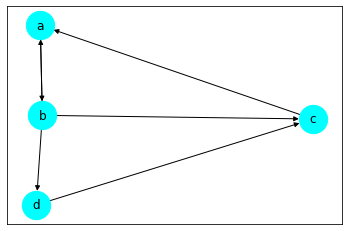

In [111]:
#plot our graph
nx.draw_networkx(b,with_labels=True, node_size=800,node_color='cyan')

## Creating Multi graph 

( MultiGraph—Undirected graphs with self loops and parallel multiple edges)

In [112]:
G = nx.MultiGraph()

In [113]:
G.add_node(1)
G.add_nodes_from([2,3])
G.add_nodes_from(range(100,110))

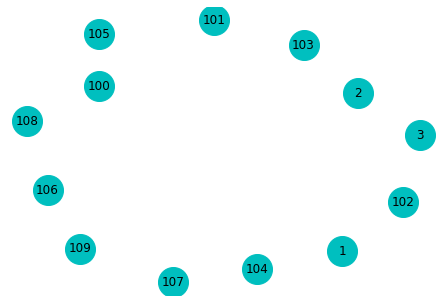

In [114]:
nx.draw(G,with_labels=True,node_color='c',node_size=900)

In [115]:
G.add_edge(1,2,wieght=4.7)


0

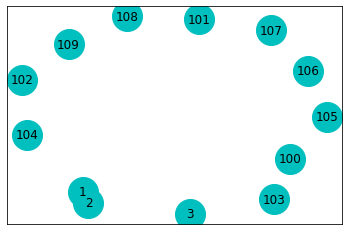

In [116]:
nx.draw_networkx(G,with_labels=True,node_color='c',node_size=900)

In [117]:
G.add_edge(101,102,wieght=10.7)

0

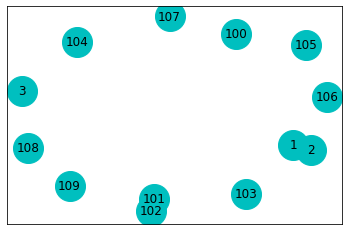

In [118]:
nx.draw_networkx(G,with_labels=True,node_color='c',node_size=900)


In [119]:
G.edges(data=True)

MultiEdgeDataView([(1, 2, {'wieght': 4.7}), (101, 102, {'wieght': 10.7})])

## Creating Multi-digraph

In [120]:
GM = nx.MultiDiGraph(day='Sunday', month='January',Year='2015', DOB='02/14/1985')

In [121]:
GM.graph

{'day': 'Sunday', 'month': 'January', 'Year': '2015', 'DOB': '02/14/1985'}

In [122]:
GM.add_node(1, time='11:03pm ')

In [123]:
GM.nodes[1]

{'time': '11:03pm '}

In [124]:
GM.add_edges_from([(3,4),(4,5)],weight=100, color='green')
GM.add_edges_from([(3,4),(4,5)],weight=200, color='red')
GM.add_edge(1,2, weight=100, color='green')
GM.add_edge(1,2, weight=200, color='red')

1

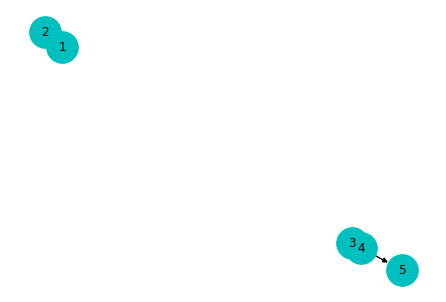

In [125]:
nx.draw_spring(GM, with_labels=True, node_color='c',node_size=1000)
plt.show()

In [126]:
GM.add_edges_from([(4,3),(5,4)],weight=200, color='red')
GM.add_edge(2,1, weight=200, color='red')

0

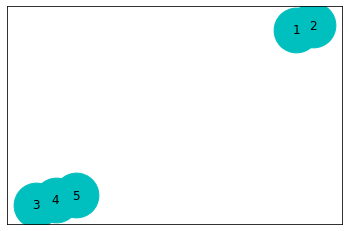

In [127]:
nx.draw_networkx(GM, with_labels=True, node_color='c',node_size=2000)
plt.show()

In [128]:
GM.nodes(data=True)

NodeDataView({1: {'time': '11:03pm '}, 3: {}, 4: {}, 5: {}, 2: {}})

In [129]:
GM.edges(data=True)

OutMultiEdgeDataView([(1, 2, {'weight': 100, 'color': 'green'}), (1, 2, {'weight': 200, 'color': 'red'}), (3, 4, {'weight': 100, 'color': 'green'}), (3, 4, {'weight': 200, 'color': 'red'}), (4, 5, {'weight': 100, 'color': 'green'}), (4, 5, {'weight': 200, 'color': 'red'}), (4, 3, {'weight': 200, 'color': 'red'}), (5, 4, {'weight': 200, 'color': 'red'}), (2, 1, {'weight': 200, 'color': 'red'})])